In [1]:
import pandas as pd
import numpy as np
import sklearn as sk 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#%matplotlib inlinelogreg=lgrg()
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [2]:
train_fields = ['TransactionID','TransactionDT','TransactionAmt','card1','card2',\
 'addr1','P_emaildomain','D1','isFraud']
test_fields = ['TransactionID','TransactionDT','TransactionAmt','card1','card2',\
 'addr1','P_emaildomain','D1']
i_fields = ['TransactionID','id_02','id_19','id_20']
t_t = pd.read_csv('train_transaction.csv',nrows=100000,usecols=train_fields)
t_i = pd.read_csv('train_identity.csv',usecols=i_fields,nrows=100000)
v_t = pd.read_csv('test_transaction.csv',usecols=test_fields,nrows=100000)
v_i = pd.read_csv('test_identity.csv',usecols=i_fields,nrows=100000)

In [3]:
print t_t
print t_i
print v_t
print v_i

       TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  \
0            2987000        0          86400          68.500  13926    NaN   
1            2987001        0          86401          29.000   2755  404.0   
2            2987002        0          86469          59.000   4663  490.0   
3            2987003        0          86499          50.000  18132  567.0   
4            2987004        0          86506          50.000   4497  514.0   
5            2987005        0          86510          49.000   5937  555.0   
6            2987006        0          86522         159.000  12308  360.0   
7            2987007        0          86529         422.500  12695  490.0   
8            2987008        0          86535          15.000   2803  100.0   
9            2987009        0          86536         117.000  17399  111.0   
10           2987010        0          86549          75.887  16496  352.0   
11           2987011        0          86555          16.495   4

In [4]:
t_m = t_t.merge(t_i, on='TransactionID', how='left')
t_m_labels = t_m.columns.tolist()
#print t_m.dropna(axis=0,how='any')
t_m_clean = t_m.dropna(axis=0,how='any')
print t_m_clean
print (t_m_labels)


       TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  \
4            2987004        0          86506            50.0   4497  514.0   
8            2987008        0          86535            15.0   2803  100.0   
16           2987016        0          86620            30.0   1790  555.0   
17           2987017        0          86668           100.0  11492  111.0   
57           2987057        0          87445            50.0  11839  490.0   
66           2987066        0          87660           300.0  15333  562.0   
70           2987070        0          87735           100.0   3682  264.0   
93           2987093        0          88070            50.0   5220  360.0   
99           2987099        0          88162            75.0   1214  174.0   
100          2987100        0          88169           100.0  16659  170.0   
101          2987101        0          88174            25.0   4523  423.0   
104          2987104        0          88208           100.0  16

In [5]:
#t_m_clean['TransactionAmt']=t_m_clean['TransactionAmt']/t_m_clean['TransactionAmt'].max()
t_m_clean['TransactionDT']=t_m_clean['TransactionDT']/t_m_clean['TransactionDT'].max()
t_m_clean['card1']=t_m_clean['card1']/t_m_clean['card1'].max()
t_m_clean['card2']=t_m_clean['card2']/t_m_clean['card2'].max()
t_m_clean['D1']=t_m_clean['D1']/t_m_clean['D1'].max()
t_m_clean['id_02']=t_m_clean['id_02']/t_m_clean['id_02'].max()
t_m_clean['id_19']=t_m_clean['id_19']/t_m_clean['id_19'].max()
t_m_clean['id_20']=t_m_clean['id_20']/t_m_clean['id_20'].max()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [6]:
print t_m_clean

       TransactionID  isFraud  TransactionDT  TransactionAmt     card1  \
4            2987004        0       0.043120            50.0  0.244562   
8            2987008        0       0.043134            15.0  0.152436   
16           2987016        0       0.043177            30.0  0.097346   
17           2987017        0       0.043201           100.0  0.624973   
57           2987057        0       0.043588            50.0  0.643844   
66           2987066        0       0.043695           300.0  0.833859   
70           2987070        0       0.043732           100.0  0.200239   
93           2987093        0       0.043899            50.0  0.283881   
99           2987099        0       0.043945            75.0  0.066021   
100          2987100        0       0.043949           100.0  0.905971   
101          2987101        0       0.043951            25.0  0.245976   
104          2987104        0       0.043968           100.0  0.905971   
119          2987119        0       0.

In [7]:

v_m = v_t.merge(v_i, on='TransactionID', how='left')
v_m_labels = v_m.columns.tolist()
print (v_m_labels)
v_m_clean = v_m.dropna(axis=0,how='any')
#v_m_clean = v_m.dropna(axis=0,how='any',inplace=True)
print v_m_clean

['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'addr1', 'P_emaildomain', 'D1', 'id_02', 'id_19', 'id_20']
       TransactionID  TransactionDT  TransactionAmt  card1  card2  addr1  \
73           3663622       18404814            50.0  12839  321.0  512.0   
75           3663624       18404835            50.0  12839  321.0  512.0   
77           3663626       18404886            50.0  12839  321.0  512.0   
80           3663629       18405020            50.0  12839  321.0  512.0   
109          3663658       18405854            25.0   5721  225.0  264.0   
128          3663677       18406256            50.0   8394  490.0  325.0   
144          3663693       18406839           100.0   8431  269.0  269.0   
195          3663744       18408849           100.0   1214  174.0  327.0   
209          3663758       18409374            75.0   7482  490.0  325.0   
236          3663785       18410574           100.0  12791  399.0  299.0   
272          3663821       1841203

In [8]:

#for colnam in v_m_labels:
#   v_m_clean[colnam] = v_m_clean[colnam]/v_m_clean[colnam].max()
#for colnam in t_m_labels:
#   t_m_clean[colnam] = t_m_clean[colnam]/t_m_clean[colnam].max()
v_m_clean['TransactionAmt']=v_m_clean['TransactionAmt']/v_m_clean['TransactionAmt'].max()
v_m_clean['TransactionDT']=v_m_clean['TransactionDT']/v_m_clean['TransactionDT'].max()
v_m_clean['card1']=v_m_clean['card1']/v_m_clean['card1'].max()
v_m_clean['card2']=v_m_clean['card2']/v_m_clean['card2'].max()
v_m_clean['D1']=v_m_clean['D1']/v_m_clean['D1'].max()
v_m_clean['id_02']=v_m_clean['id_02']/v_m_clean['id_02'].max()
v_m_clean['id_19']=v_m_clean['id_19']/v_m_clean['id_19'].max()
v_m_clean['id_20']=v_m_clean['id_20']/v_m_clean['id_20'].max()


#v_m_clean['card1']=v_m_clean['TransactionDT']/v_m_clean['TransactionDT'].max()
#t_m_clean['TransactionDT']=t_m_clean['TransactionDT']/t_m_clean['TransactionDT'].max()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [9]:
print v_m_clean


       TransactionID  TransactionDT  TransactionAmt     card1     card2  \
73           3663622       0.845885          0.0250  0.698721  0.535000   
75           3663624       0.845886          0.0250  0.698721  0.535000   
77           3663626       0.845888          0.0250  0.698721  0.535000   
80           3663629       0.845895          0.0250  0.698721  0.535000   
109          3663658       0.845933          0.0125  0.311347  0.375000   
128          3663677       0.845951          0.0250  0.456816  0.816667   
144          3663693       0.845978          0.0500  0.458830  0.448333   
195          3663744       0.846070          0.0500  0.066068  0.290000   
209          3663758       0.846095          0.0375  0.407184  0.816667   
236          3663785       0.846150          0.0500  0.696109  0.665000   
272          3663821       0.846217          0.1250  0.603646  0.665000   
278          3663827       0.846223          0.1250  0.910313  0.185000   
279          3663828     

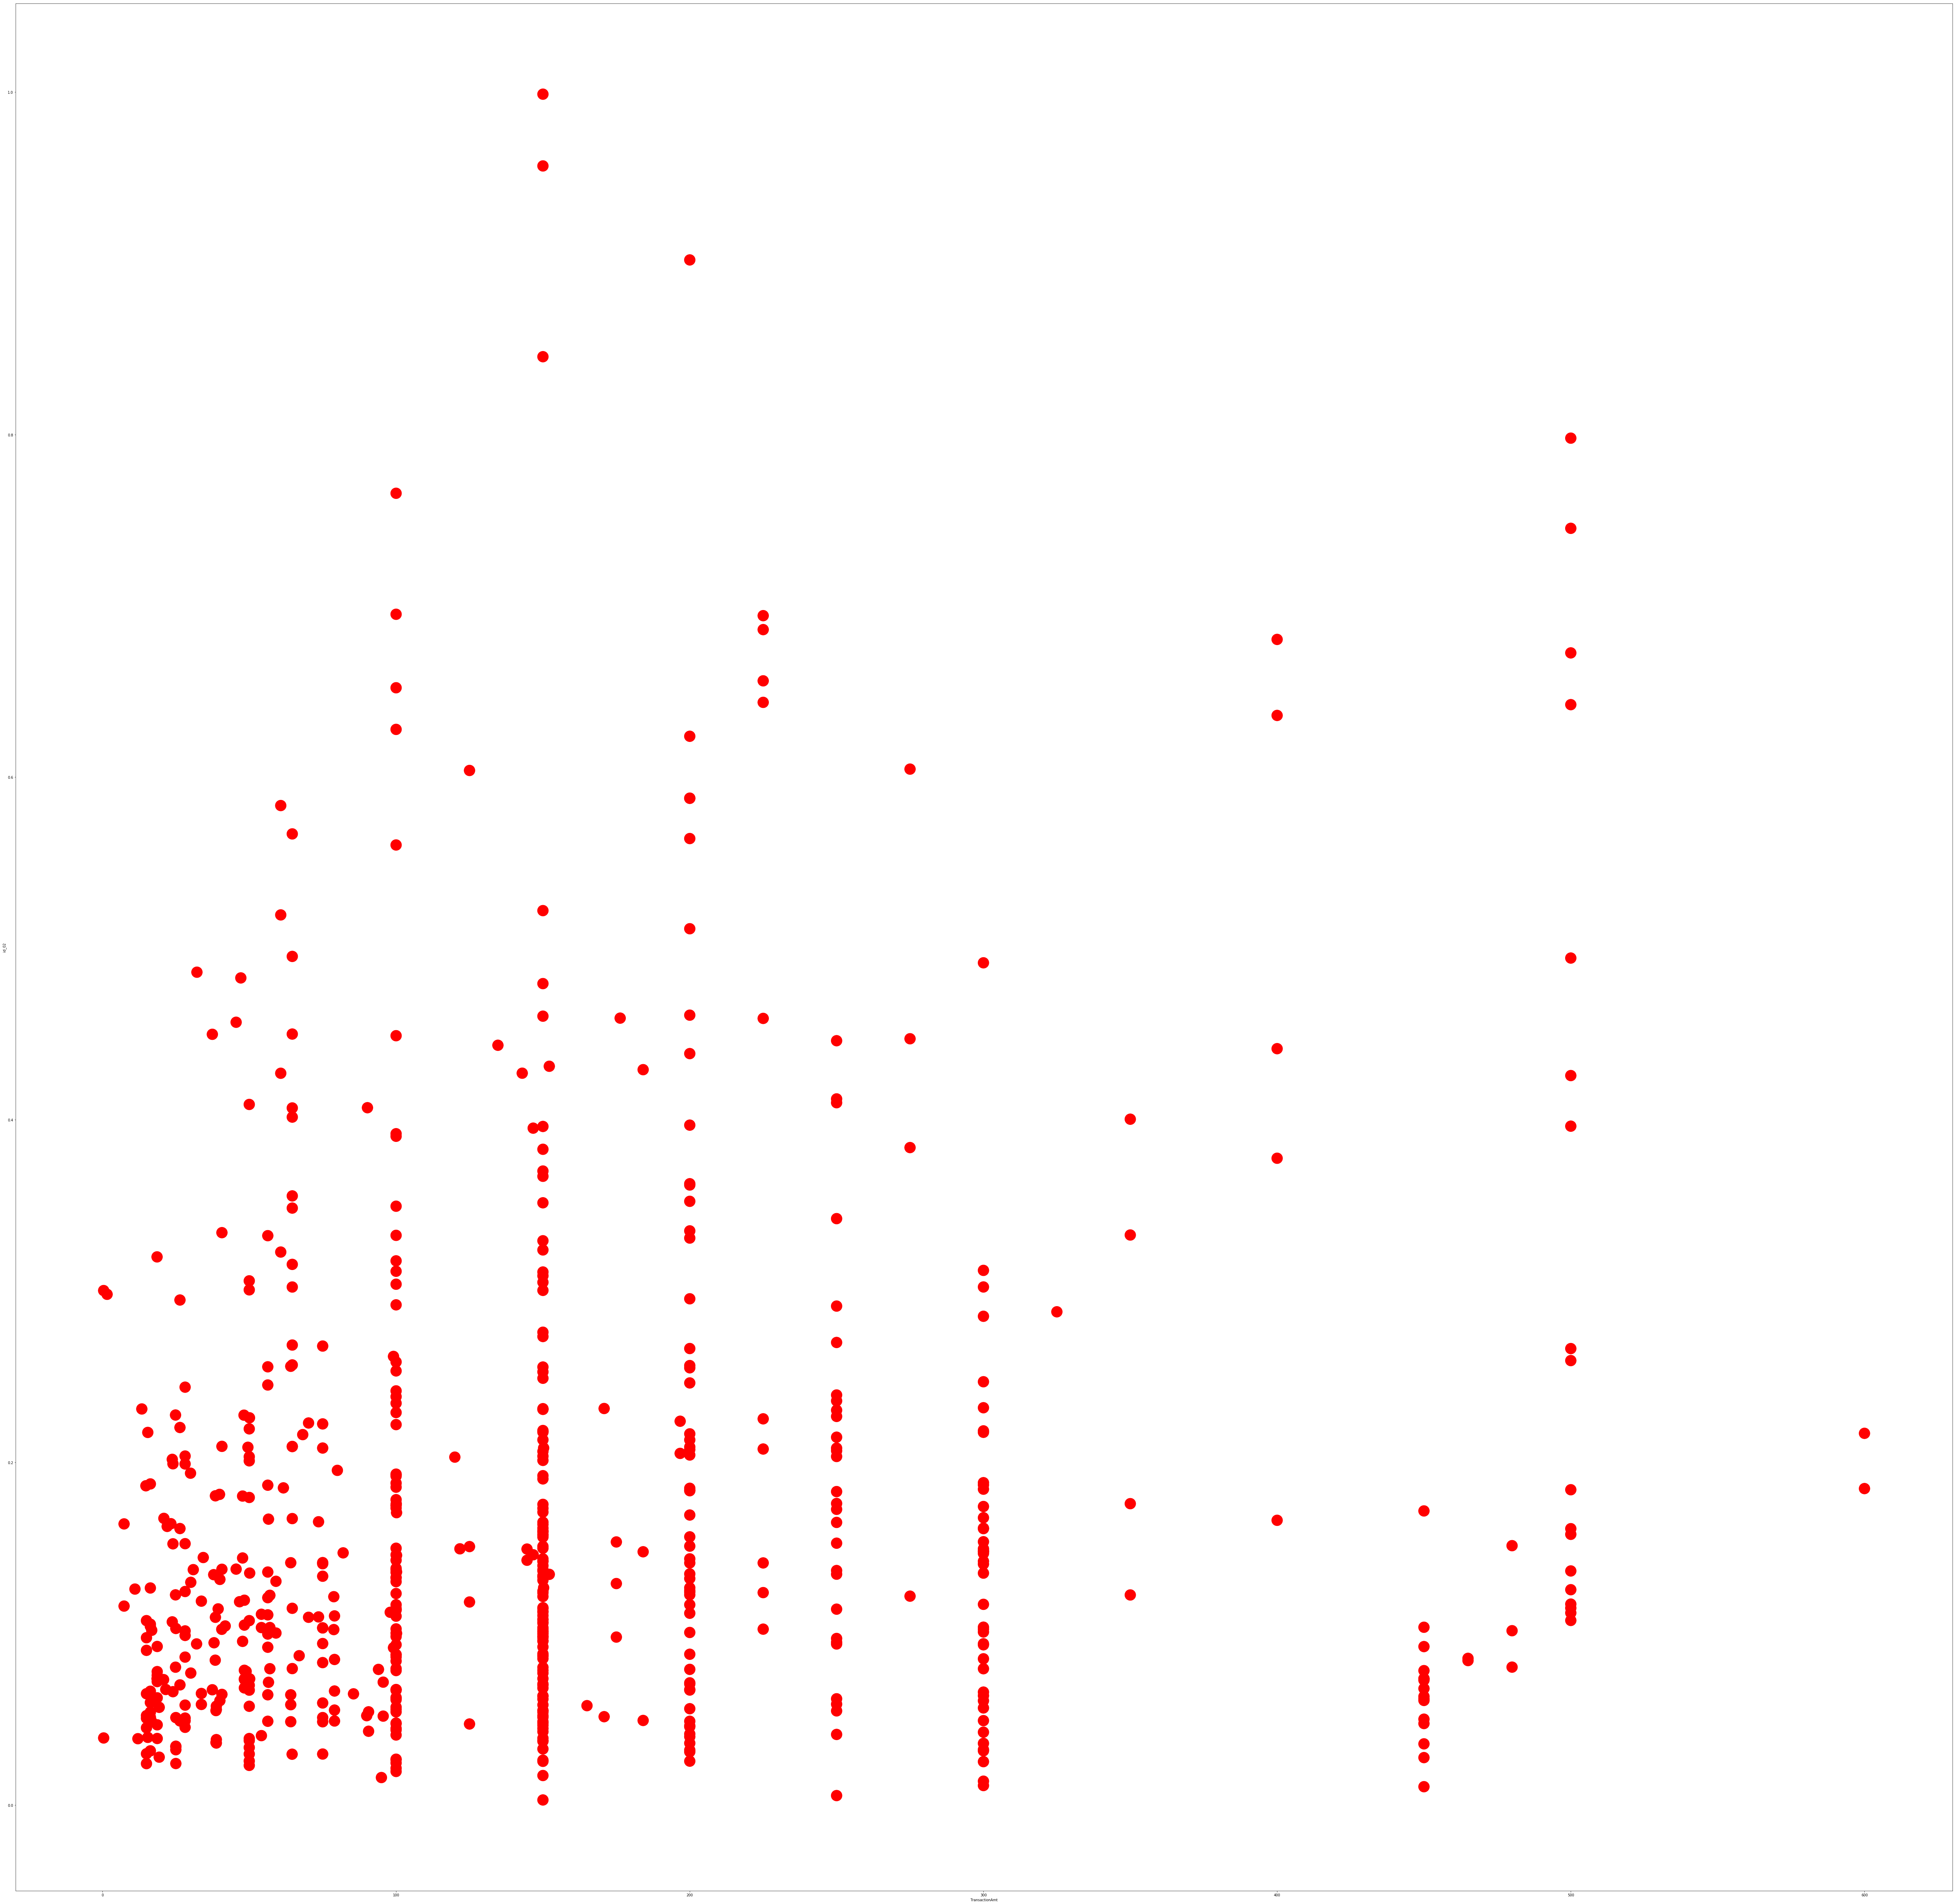

In [10]:
t_m_plot = t_m_clean[t_m_clean.isFraud == 1]
colors = np.where(t_m_plot.isFraud==1,'r', 'w')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=100
fig_size[1]=100
plt.rcParams["figure.figsize"] = fig_size
t_m_plot.plot(kind='scatter',x='TransactionAmt',y='id_02',c=colors, alpha=1.0,s=1000)

In [11]:
#t_m_clean.hist(column='TransactionAmt',bins=50, by='isFraud')

In [12]:
print t_m_clean

       TransactionID  isFraud  TransactionDT  TransactionAmt     card1  \
4            2987004        0       0.043120            50.0  0.244562   
8            2987008        0       0.043134            15.0  0.152436   
16           2987016        0       0.043177            30.0  0.097346   
17           2987017        0       0.043201           100.0  0.624973   
57           2987057        0       0.043588            50.0  0.643844   
66           2987066        0       0.043695           300.0  0.833859   
70           2987070        0       0.043732           100.0  0.200239   
93           2987093        0       0.043899            50.0  0.283881   
99           2987099        0       0.043945            75.0  0.066021   
100          2987100        0       0.043949           100.0  0.905971   
101          2987101        0       0.043951            25.0  0.245976   
104          2987104        0       0.043968           100.0  0.905971   
119          2987119        0       0.

In [13]:
#help(t_m_clean.drop)

In [14]:
email=t_m_clean['P_emaildomain']
y_train = t_m_clean['isFraud']
print (y_train)

4        0
8        0
16       0
17       0
57       0
66       0
70       0
93       0
99       0
100      0
101      0
104      0
119      0
121      0
125      0
138      0
141      0
144      0
145      0
148      0
156      0
167      0
173      0
183      0
197      0
198      0
207      0
211      0
236      0
248      0
        ..
99897    0
99904    0
99907    0
99909    0
99913    0
99922    0
99925    0
99932    0
99934    0
99936    0
99940    0
99949    0
99950    0
99952    0
99953    0
99954    0
99957    0
99961    0
99964    0
99966    0
99973    0
99980    0
99983    0
99985    0
99987    0
99988    0
99990    0
99991    0
99993    0
99998    0
Name: isFraud, Length: 29731, dtype: int64


In [15]:

t_m_clean = t_m_clean.drop(['TransactionID', 'isFraud','TransactionDT','P_emaildomain'],1)
v_m_clean = v_m_clean.drop(['TransactionID', 'TransactionDT','P_emaildomain'],1)

  
    

In [16]:
print v_m_clean

       TransactionAmt     card1     card2  addr1        D1     id_02  \
73             0.0250  0.698721  0.535000  512.0  0.000000  0.036807   
75             0.0250  0.698721  0.535000  512.0  0.000000  0.012584   
77             0.0250  0.698721  0.535000  512.0  0.000000  0.044751   
80             0.0250  0.698721  0.535000  512.0  0.000000  0.126068   
109            0.0125  0.311347  0.375000  264.0  0.208791  0.098797   
128            0.0250  0.456816  0.816667  325.0  0.000000  0.109236   
144            0.0500  0.458830  0.448333  269.0  0.000000  0.097293   
195            0.0500  0.066068  0.290000  327.0  0.794349  0.139448   
209            0.0375  0.407184  0.816667  325.0  0.000000  0.170842   
236            0.0500  0.696109  0.665000  299.0  0.000000  0.028834   
272            0.1250  0.603646  0.665000  441.0  0.000000  0.101851   
278            0.1250  0.910313  0.185000  441.0  0.000000  0.235606   
279            0.1250  0.910313  0.185000  441.0  0.000000  0.25

In [17]:
#print email

In [18]:
print t_m_clean

       TransactionAmt     card1     card2  addr1        D1     id_02  \
4                50.0  0.244562  0.856667  420.0  0.000000  0.070816   
8                15.0  0.152436  0.166667  337.0  0.000000  0.098985   
16               30.0  0.097346  0.925000  170.0  0.000000  0.007463   
17              100.0  0.624973  0.185000  204.0  0.000000  0.061166   
57               50.0  0.643844  0.816667  204.0  0.000000  0.088561   
66              300.0  0.833859  0.936667  315.0  0.000000  0.054949   
70              100.0  0.200239  0.440000  325.0  0.000000  0.132410   
93               50.0  0.283881  0.600000  231.0  0.000000  0.034824   
99               75.0  0.066021  0.290000  126.0  0.000000  0.129132   
100             100.0  0.905971  0.283333  330.0  0.000000  0.264925   
101              25.0  0.245976  0.705000  337.0  0.000000  0.049577   
104             100.0  0.905971  0.283333  330.0  0.000000  0.030708   
119             100.0  0.133565  0.665000  299.0  0.000000  0.02

In [19]:
t_m_clean=preprocessing.scale(t_m_clean)
v_m_clean=preprocessing.scale(v_m_clean)

In [20]:
#t_m_clean.concat([t_m_clean,email], axis=1) #['P_emaildomain']=email

In [21]:
lgrg=LogisticRegression()
lgrg.fit(t_m_clean, y_train)



/home/jpfredette/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_predict = lgrg.predict(v_m_clean)

In [23]:
print y_predict

[0 0 0 ... 0 0 0]
